In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("Layer11/train.csv")
df_valid = pd.read_csv("Layer11/valid.csv")
df_test = pd.read_csv("Layer11/test.csv")

In [4]:
df_train_X = df_train.copy()
df_train_X.drop(['label_1', 'label_2', 'label_4'], axis=1, inplace=True)
df_train_y = df_train_X.pop('label_3')

df_valid_X = df_valid.copy()
df_valid_X.drop(['label_1', 'label_2', 'label_4'], axis=1, inplace=True)
df_valid_y = df_valid_X.pop('label_3')

df_test_X = df_test.copy()
df_test_X.drop(['ID'], axis=1, inplace=True)

<AxesSubplot:>

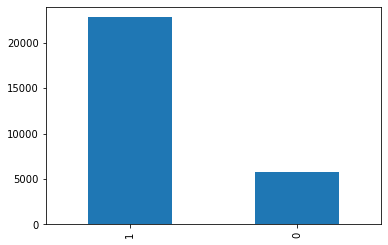

In [5]:
df_train['label_3'].value_counts().plot(kind='bar')

In [6]:
from scipy import stats

In [7]:
z_scores = abs(stats.zscore(df_train_y))

In [8]:
outliers = df_train_y[abs(z_scores) > 2]
outliers.count()

0

In [9]:
from sklearn.preprocessing import StandardScaler as ss

In [10]:
scaler = ss()
scaler.fit(df_train_X)

StandardScaler()

In [11]:
df_train_X_scaled = scaler.transform(df_train_X)
df_valid_X_scaled = scaler.transform(df_valid_X)
df_test_X_scaled = scaler.transform(df_test_X)

In [12]:
from sklearn.linear_model import LogisticRegression as lrc

In [13]:
lrc_initial = lrc(max_iter=1000)
lrc_initial.fit(df_train_X_scaled, df_train_y)

LogisticRegression(max_iter=1000)

In [14]:
y_pred_initial_lrc = lrc_initial.predict(df_valid_X_scaled)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [16]:
acs_initial = accuracy_score(df_valid_y, y_pred_initial_lrc)
pcs_initial = precision_score(df_valid_y, y_pred_initial_lrc, average='weighted')
rcs_initial = recall_score(df_valid_y, y_pred_initial_lrc, average='weighted')
print(f"Accuracy score initial: {acs_initial:.4f}")
print(f"Precision score initial: {pcs_initial:.4f}")
print(f"Recall score initial: {rcs_initial:.4f}")

Accuracy score initial: 0.9933
Precision score initial: 0.9934
Recall score initial: 0.9933


In [17]:
import matplotlib.pyplot as plt

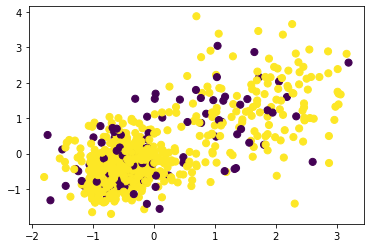

In [18]:
plt.scatter(df_valid_X_scaled[:, 0], df_valid_X_scaled[:, 1], c=lrc_initial.predict(df_valid_X_scaled), s=50)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(0.998)
pca.fit(df_train_X_scaled)

pca_df_train_X = pca.transform(df_train_X_scaled)
pca_df_valid_X = pca.transform(df_valid_X_scaled)
pca_df_test_X = pca.transform(df_test_X_scaled)

In [21]:
pca_df_train_X.shape

(28520, 589)

In [22]:
lrc_after = lrc(max_iter=1000)
lrc_after.fit(pca_df_train_X, df_train_y)

LogisticRegression(max_iter=1000)

In [23]:
y_pred_pca_lrc = lrc_after.predict(pca_df_valid_X)

In [24]:
acs_after = accuracy_score(df_valid_y, y_pred_pca_lrc)
pcs_after = precision_score(df_valid_y, y_pred_pca_lrc, average='weighted')
rcs_after = recall_score(df_valid_y, y_pred_pca_lrc, average='weighted')
print(f"Accuracy score after: {acs_after:.4f}")
print(f"Precision score after: {pcs_after:.4f}")
print(f"Recall score after: {rcs_after:.4f}")

Accuracy score after: 0.9933
Precision score after: 0.9934
Recall score after: 0.9933


In [25]:
from sklearn.model_selection import RandomizedSearchCV as rscv

In [26]:
import numpy as np

In [27]:
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
}

In [28]:
lrc_tuning = lrc()
random_search = rscv(lrc_tuning, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(pca_df_train_X, df_train_y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/fusionists/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fusionists/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/fusionists/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fusionists/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/fusionists/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been depreca

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-0...
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
                                        'penalty': ['l1', 'l2', 'none'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']},
                   random_state=42, verbose=1)

In [29]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 8.697490026177835}
Best Score: 0.983765778401122


In [30]:
lrc_after_tuning = lrc(**best_params)
lrc_after_tuning.fit(pca_df_train_X, df_train_y)

LogisticRegression(C=8.697490026177835, solver='liblinear')

In [34]:
y_pred_after_tuning_lrc = lrc_after_tuning.predict(pca_df_test_X)

In [32]:
acs_after_tuning = accuracy_score(df_valid_y, y_pred_after_tuning_lrc)
pcs_after_tuning = precision_score(df_valid_y, y_pred_after_tuning_lrc, average='weighted')
rcs_after_tuning = recall_score(df_valid_y, y_pred_after_tuning_lrc, average='weighted')
print(f"Accuracy score after tuning: {acs_after_tuning:.4f}")
print(f"Precision score after tuning: {pcs_after_tuning:.4f}")
print(f"Recall score after tuning: {rcs_after_tuning:.4f}")

Accuracy score after tuning: 0.9920
Precision score after tuning: 0.9922
Recall score after tuning: 0.9920


In [35]:
import csv

In [36]:
IDs = [i+1 for i in range(len(y_pred_after_tuning_lrc))]

In [37]:
Data = {
    'ID': IDs,
    'label_3': y_pred_after_tuning_lrc 
}

In [38]:
data_frame = pd.DataFrame(Data)
data_frame.head

<bound method NDFrame.head of       ID  label_3
0      1        0
1      2        1
2      3        1
3      4        1
4      5        0
..   ...      ...
739  740        1
740  741        1
741  742        1
742  743        1
743  744        1

[744 rows x 2 columns]>

In [39]:
csv_file = 'Layer11_Label03.csv'
data_frame.to_csv(csv_file, index=False)